In [9]:
import pandas as pd
from zipfile import ZipFile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install odfpy
sns.set()

In [10]:
zf = ZipFile('data\DTB_2020_v2.zip')
df_loc = pd.read_excel(zf.open('RELATORIO_DTB_BRASIL_MUNICIPIO.ods'),engine='odf')
df = pd.read_csv("./data/PAM.zip", encoding="UTF-8", sep=";", decimal=",")
df.head()

codigo_municipio   ano  area_plantada  area_colhida  valor_reais  \
0                 1  1990     53152446.0    50514696.0          NaN   
1                 1  1991     51753078.0    50643873.0          NaN   
2                 1  1992     52273579.0    50714599.0          NaN   
3                 1  1993     49226752.0    46629302.0          NaN   
4                 1  1994     52815030.0    51354033.0   27500582.0   

   valor_cruzeiros  valor_cruzeiros_reais razao_plantio_colheita  
0     1.722709e+09                    NaN     0.9503738736689559  
1     8.740094e+09                    NaN     0.9785673617325717  
2     1.037775e+11                    NaN     0.9701765207237867  
3              NaN           2.111804e+09      0.947234991250286  
4              NaN                    NaN     0.9723374766614731

<AxesSubplot:title={'center':'Efficiency 2000'}, ylabel='Frequency'>

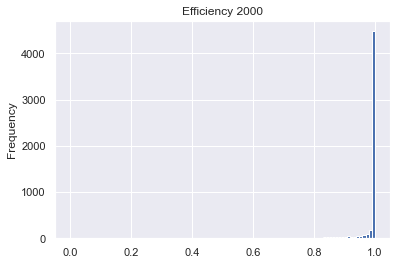

In [11]:
df.dropna(subset=['razao_plantio_colheita'],inplace=True)
year = 2000
pd.to_numeric(df[df['ano'] == year]['razao_plantio_colheita']).plot(kind='hist',bins=np.linspace(0,1,100),title=f'Efficiency {year}')

<AxesSubplot:title={'center':'Efficiency 2010'}, ylabel='Frequency'>

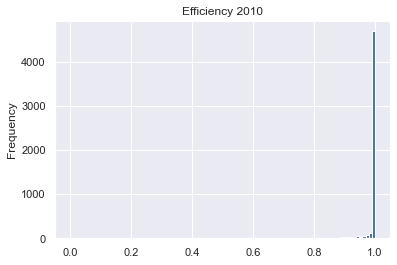

In [12]:
year = 2010
pd.to_numeric(df[df['ano'] == year]['razao_plantio_colheita']).plot(kind='hist',bins=np.linspace(0,1,100),title=f'Efficiency {year}')

<AxesSubplot:title={'center':'Efficiency 2019'}, ylabel='Frequency'>

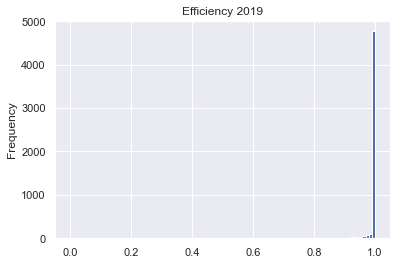

In [13]:
year = 2019
pd.to_numeric(df[df['ano'] == year]['razao_plantio_colheita']).plot(kind='hist',bins=np.linspace(0,1,100),title=f'Efficiency {year}')

In [14]:
df_loc.drop(columns=['UF',
            'Região Geográfica Intermediária',
            'Nome Região Geográfica Intermediária',
            'Região Geográfica Imediata',
            'Nome Região Geográfica Imediata',
            'Mesorregião Geográfica',
            'Nome_Mesorregião',
            'Microrregião Geográfica',
            'Nome_Microrregião',
            'Município'],
            inplace = True)
df_loc.head()

Nome_UF  Código Município Completo           Nome_Município
0  Rondônia                    1100015    Alta Floresta D'Oeste
1  Rondônia                    1100379  Alto Alegre dos Parecis
2  Rondônia                    1100403             Alto Paraíso
3  Rondônia                    1100346         Alvorada D'Oeste
4  Rondônia                    1100023                Ariquemes

In [15]:
df_complete = df_loc.merge(df,left_on='Código Município Completo',right_on='codigo_municipio',how='inner')
df_complete.drop(columns=['Código Município Completo'],inplace=True)
df_complete.head()

Nome_UF         Nome_Município  codigo_municipio   ano  area_plantada  \
0  Rondônia  Alta Floresta D'Oeste           1100015  1990        22275.0   
1  Rondônia  Alta Floresta D'Oeste           1100015  1991        23005.0   
2  Rondônia  Alta Floresta D'Oeste           1100015  1992        36020.0   
3  Rondônia  Alta Floresta D'Oeste           1100015  1993        38360.0   
4  Rondônia  Alta Floresta D'Oeste           1100015  1994        42899.0   

   area_colhida  valor_reais  valor_cruzeiros  valor_cruzeiros_reais  \
0       22275.0          NaN         462257.0                    NaN   
1       23005.0          NaN        2423889.0                    NaN   
2       36020.0          NaN       41232411.0                    NaN   
3       38360.0          NaN              NaN              1079677.0   
4       42899.0      14864.0              NaN                    NaN   

  razao_plantio_colheita  
0                    1.0  
1                    1.0  
2                    1.0  
3                    1.0  
4                    1.0

In [16]:
df_fin = pd.read_csv('data\desembolsos-mensais.zip', encoding="UTF-8", sep=";", decimal=",")
df_fin.dtypes

ano                         int64
mes                         int64
forma_de_apoio             object
produto                    object
instrumento_financeiro     object
inovacao                   object
porte_de_empresa           object
regiao                     object
uf                         object
municipio                  object
municipio_codigo            int64
setor_cnae                 object
subsetor_cnae_agrupado     object
setor_bndes                object
subsetor_bndes             object
desembolsos_reais         float64
dtype: object

In [17]:
df_agro = df_fin[(df_fin['setor_bndes']=='AGROPECUÁRIA') & (df_fin['ano'] > 1990) & (df_fin['ano'] < 2020)]
desembolso_por_municipio = df_agro[["municipio", "uf", "municipio_codigo", "desembolsos_reais"]].groupby(["municipio"]).agg(uf=("uf", "first"), municipio_codigo=("municipio_codigo", "first"), count=("desembolsos_reais", "count"), sum=("desembolsos_reais", "sum")).reset_index()
desembolso_por_municipio.head(20)


municipio                    uf  municipio_codigo  count  \
0       ABADIA DE GOIAS  GOIAS                          5200050     44   
1   ABADIA DOS DOURADOS  MINAS GERAIS                   3100104    182   
2             ABADIANIA  GOIAS                          5200100     87   
3                ABAETE  MINAS GERAIS                   3100203    460   
4            ABAETETUBA  PARA                           1500107     10   
5               ABAIARA  CEARA                          2300101      4   
6                ABAIRA  BAHIA                          2900108     16   
7                 ABARE  BAHIA                          2900207     13   
8                ABATIA  PARANA                         4100103    216   
9         ABDON BATISTA  SANTA CATARINA                 4200051    178   
10      ABEL FIGUEIREDO  PARA                           1500131     20   
11         ABELARDO LUZ  SANTA CATARINA                 4200101    764   
12           ABRE CAMPO  MINAS GERAIS                   3100302     77   
13          ABREULANDIA  TOCANTINS                      1700251     87   
14              ACAIACA  MINAS GERAIS                   3100401      5   
15           ACAILANDIA  MARANHAO                       2100055    262   
16            ACAJUTIBA  BAHIA                          2900306     12   
17                ACARA  PARA                           1500206     21   
18              ACARAPE  CEARA                          2300150      5   
19               ACARAU  CEARA                          2300200     77   

             sum  
0   7.860183e+06  
1   2.360563e+07  
2   1.887410e+07  
3   5.368103e+07  
4   5.910355e+05  
5   1.325874e+05  
6   3.916210e+06  
7   8.673448e+06  
8   2.792677e+07  
9   1.245499e+07  
10  5.395685e+06  
11  2.540299e+08  
12  7.060850e+06  
13  2.312626e+07  
14  3.396817e+05  
15  1.130114e+08  
16  5.719689e+05  
17  3.176880e+06  
18  2.138403e+05  
19  1.016215e+07

In [18]:
df_delta = df_complete.drop(columns=['valor_reais','valor_cruzeiros','valor_cruzeiros_reais'])
df_delta = df_delta[(df_delta['ano'] == 2000) | (df_delta['ano'] == 2019)].reset_index(drop=True)
df_delta[['codigo_municipio','area_plantada','area_colhida','razao_plantio_colheita']] = df_delta[['codigo_municipio','area_plantada','area_colhida','razao_plantio_colheita']].astype('float')
df_delta['codigo_municipio'] = df_delta['codigo_municipio'].astype('float')

df_delta.head()

Nome_UF           Nome_Município  codigo_municipio   ano  area_plantada  \
0  Rondônia    Alta Floresta D'Oeste         1100015.0  2000        29841.0   
1  Rondônia    Alta Floresta D'Oeste         1100015.0  2019        17787.0   
2  Rondônia  Alto Alegre dos Parecis         1100379.0  2000        15840.0   
3  Rondônia  Alto Alegre dos Parecis         1100379.0  2019        23100.0   
4  Rondônia             Alto Paraíso         1100403.0  2000        14050.0   

   area_colhida  razao_plantio_colheita  
0       29841.0                1.000000  
1       17778.0                0.999494  
2       15835.0                0.999684  
3       23089.0                0.999524  
4       14050.0                1.000000

In [19]:
df_delta = df_delta.pivot(index = ['Nome_UF','Nome_Município','codigo_municipio'],columns='ano',values = ['area_plantada','area_colhida','razao_plantio_colheita']).reset_index()
df_delta.head()

Nome_UF Nome_Município codigo_municipio area_plantada          \
ano                                                  2000    2019   
0      Acre     Acrelândia        1200013.0        4236.0  4358.0   
1      Acre   Assis Brasil        1200054.0        1205.0  1739.0   
2      Acre      Brasiléia        1200104.0       10349.0  3413.0   
3      Acre         Bujari        1200138.0        2057.0  3254.0   
4      Acre       Capixaba        1200179.0        2964.0  4323.0   

    area_colhida         razao_plantio_colheita            
ano         2000    2019                   2000      2019  
0         4236.0  3875.0                    1.0  0.889169  
1         1205.0  1715.0                    1.0  0.986199  
2        10349.0  3353.0                    1.0  0.982420  
3         2057.0  3050.0                    1.0  0.937308  
4         2964.0  4201.0                    1.0  0.971779

In [20]:
for column in ['area_plantada','area_colhida','razao_plantio_colheita']:
    df_delta[f'variacao_{column}'] = df_delta[column][2019] - df_delta[column][2000]
df_delta.head()

Nome_UF Nome_Município codigo_municipio area_plantada          \
ano                                                  2000    2019   
0      Acre     Acrelândia        1200013.0        4236.0  4358.0   
1      Acre   Assis Brasil        1200054.0        1205.0  1739.0   
2      Acre      Brasiléia        1200104.0       10349.0  3413.0   
3      Acre         Bujari        1200138.0        2057.0  3254.0   
4      Acre       Capixaba        1200179.0        2964.0  4323.0   

    area_colhida         razao_plantio_colheita            \
ano         2000    2019                   2000      2019   
0         4236.0  3875.0                    1.0  0.889169   
1         1205.0  1715.0                    1.0  0.986199   
2        10349.0  3353.0                    1.0  0.982420   
3         2057.0  3050.0                    1.0  0.937308   
4         2964.0  4201.0                    1.0  0.971779   

    variacao_area_plantada variacao_area_colhida  \
ano                                                
0                    122.0                -361.0   
1                    534.0                 510.0   
2                  -6936.0               -6996.0   
3                   1197.0                 993.0   
4                   1359.0                1237.0   

    variacao_razao_plantio_colheita  
ano                                  
0                         -0.110831  
1                         -0.013801  
2                         -0.017580  
3                         -0.062692  
4                         -0.028221

In [21]:
df_crescimento = df_delta[['Nome_UF','Nome_Município','codigo_municipio','variacao_area_plantada','variacao_area_colhida','variacao_razao_plantio_colheita']].droplevel('ano',axis=1)
df_crescimento = desembolso_por_municipio[['municipio_codigo','sum']].merge(df_crescimento,left_on='municipio_codigo',right_on='codigo_municipio')
df_crescimento.head()

municipio_codigo          sum       Nome_UF       Nome_Município  \
0           5200050   7860183.40         Goiás      Abadia de Goiás   
1           3100104  23605631.94  Minas Gerais  Abadia dos Dourados   
2           5200100  18874102.71         Goiás            Abadiânia   
3           3100203  53681032.97  Minas Gerais               Abaeté   
4           1500107    591035.51          Pará           Abaetetuba   

   codigo_municipio  variacao_area_plantada  variacao_area_colhida  \
0         5200050.0                    70.0                   70.0   
1         3100104.0                  1379.0                 1379.0   
2         5200100.0                  5546.0                 5566.0   
3         3100203.0                 -1631.0                -1631.0   
4         1500107.0                 24020.0                24020.0   

   variacao_razao_plantio_colheita  
0                         0.000000  
1                         0.000000  
2                         0.005013  
3                         0.000000  
4                         0.000000

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='sum', ylabel='variacao_razao_plantio_colheita'>

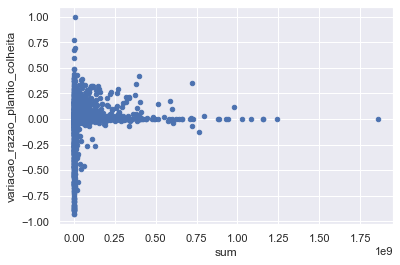

In [22]:
df_crescimento.plot.scatter(x='sum',y='variacao_razao_plantio_colheita')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='sum', ylabel='variacao_area_plantada'>

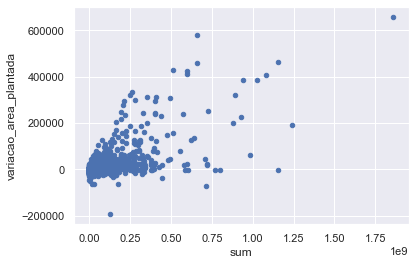

In [23]:
df_crescimento.plot.scatter(x='sum',y='variacao_area_plantada')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='sum', ylabel='variacao_area_colhida'>

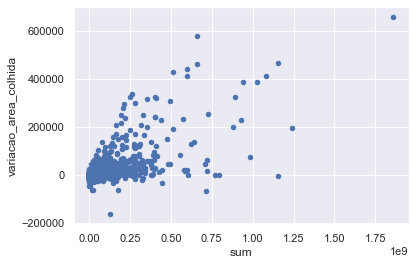

In [24]:
df_crescimento.plot.scatter(x='sum',y='variacao_area_colhida')

In [25]:
df_agro_size = pd.get_dummies(df_agro[['municipio_codigo','porte_de_empresa','ano']],columns=['porte_de_empresa']).groupby(by=['ano','municipio_codigo']).sum()
df_agro_size = df_agro_size.reset_index()
df_agro_delta_size = df_agro_size[(df_agro_size['ano'] == 2000) | (df_agro_size['ano'] == 2019)]
df_agro_delta_size = df_agro_delta_size.pivot(index = 'municipio_codigo',columns='ano',values = ['porte_de_empresa_GRANDE','porte_de_empresa_MICRO','porte_de_empresa_MÉDIA','porte_de_empresa_PEQUENA']).reset_index()
df_agro_delta_size = df_agro_delta_size.fillna(0)
df_agro_delta_size.head()

municipio_codigo porte_de_empresa_GRANDE      porte_de_empresa_MICRO  \
ano                                     2000 2019                   2000   
0            1100015                     0.0  0.0                    3.0   
1            1100023                     0.0  0.0                    3.0   
2            1100031                     0.0  0.0                    0.0   
3            1100049                     0.0  0.0                    0.0   
4            1100056                     0.0  0.0                    2.0   

          porte_de_empresa_MÉDIA      porte_de_empresa_PEQUENA        
ano  2019                   2000 2019                     2000  2019  
0    12.0                    0.0  0.0                      0.0   8.0  
1     1.0                    0.0  1.0                      1.0   2.0  
2     5.0                    0.0  1.0                      0.0   6.0  
3    22.0                    0.0  4.0                      0.0  10.0  
4     3.0                    0.0  2.0                      0.0   6.0

In [26]:
for column in ['porte_de_empresa_GRANDE','porte_de_empresa_MICRO','porte_de_empresa_MÉDIA','porte_de_empresa_PEQUENA']:
    df_agro_delta_size[f'variacao_{column}'] = df_agro_delta_size[column][2019] - df_agro_delta_size[column][2000]
df_agro_delta_size.head()

municipio_codigo porte_de_empresa_GRANDE      porte_de_empresa_MICRO  \
ano                                     2000 2019                   2000   
0            1100015                     0.0  0.0                    3.0   
1            1100023                     0.0  0.0                    3.0   
2            1100031                     0.0  0.0                    0.0   
3            1100049                     0.0  0.0                    0.0   
4            1100056                     0.0  0.0                    2.0   

          porte_de_empresa_MÉDIA      porte_de_empresa_PEQUENA        \
ano  2019                   2000 2019                     2000  2019   
0    12.0                    0.0  0.0                      0.0   8.0   
1     1.0                    0.0  1.0                      1.0   2.0   
2     5.0                    0.0  1.0                      0.0   6.0   
3    22.0                    0.0  4.0                      0.0  10.0   
4     3.0                    0.0  2.0                      0.0   6.0   

    variacao_porte_de_empresa_GRANDE variacao_porte_de_empresa_MICRO  \
ano                                                                    
0                                0.0                             9.0   
1                                0.0                            -2.0   
2                                0.0                             5.0   
3                                0.0                            22.0   
4                                0.0                             1.0   

    variacao_porte_de_empresa_MÉDIA variacao_porte_de_empresa_PEQUENA  
ano                                                                    
0                               0.0                               8.0  
1                               1.0                               1.0  
2                               1.0                               6.0  
3                               4.0                              10.0  
4                               2.0                               6.0

In [27]:
df_agro_delta_size = df_agro_delta_size[['municipio_codigo','variacao_porte_de_empresa_GRANDE','variacao_porte_de_empresa_MICRO','variacao_porte_de_empresa_MÉDIA','variacao_porte_de_empresa_PEQUENA']].droplevel('ano',axis=1)
df_crescimento = df_crescimento.merge(df_agro_delta_size,on='municipio_codigo')
df_crescimento.head()


municipio_codigo          sum       Nome_UF       Nome_Município  \
0           3100104  23605631.94  Minas Gerais  Abadia dos Dourados   
1           5200100  18874102.71         Goiás            Abadiânia   
2           3100203  53681032.97  Minas Gerais               Abaeté   
3           1500107    591035.51          Pará           Abaetetuba   
4           2900108   3916209.85         Bahia               Abaíra   

   codigo_municipio  variacao_area_plantada  variacao_area_colhida  \
0         3100104.0                  1379.0                 1379.0   
1         5200100.0                  5546.0                 5566.0   
2         3100203.0                 -1631.0                -1631.0   
3         1500107.0                 24020.0                24020.0   
4         2900108.0                 -1232.0                -1232.0   

   variacao_razao_plantio_colheita  variacao_porte_de_empresa_GRANDE  \
0                         0.000000                               0.0   
1                         0.005013                               0.0   
2                         0.000000                               0.0   
3                         0.000000                               0.0   
4                         0.000000                               0.0   

   variacao_porte_de_empresa_MICRO  variacao_porte_de_empresa_MÉDIA  \
0                              1.0                              0.0   
1                              0.0                              0.0   
2                             -8.0                              0.0   
3                             -2.0                              0.0   
4                              0.0                              0.0   

   variacao_porte_de_empresa_PEQUENA  
0                                6.0  
1                                1.0  
2                               11.0  
3                                0.0  
4                                1.0

<AxesSubplot:xlabel='sum', ylabel='variacao_razao_plantio_colheita'>

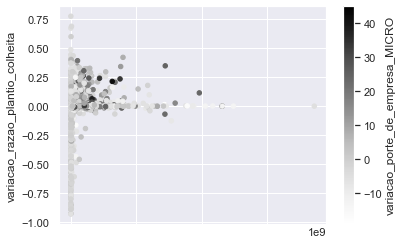

In [28]:
df_crescimento.plot.scatter(x='sum',y='variacao_razao_plantio_colheita',c='variacao_porte_de_empresa_MICRO')

<AxesSubplot:xlabel='sum', ylabel='variacao_razao_plantio_colheita'>

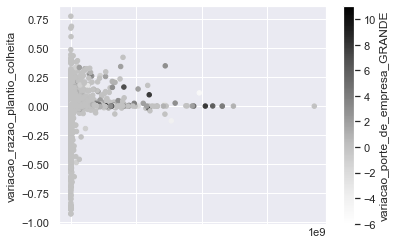

In [29]:
df_crescimento.plot.scatter(x='sum',y='variacao_razao_plantio_colheita',c='variacao_porte_de_empresa_GRANDE')

<AxesSubplot:xlabel='sum', ylabel='variacao_area_plantada'>

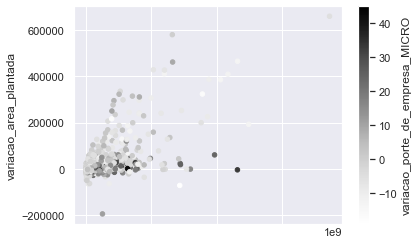

In [30]:
df_crescimento.plot.scatter(x='sum',y='variacao_area_plantada',c='variacao_porte_de_empresa_MICRO')

<AxesSubplot:xlabel='sum', ylabel='variacao_area_plantada'>

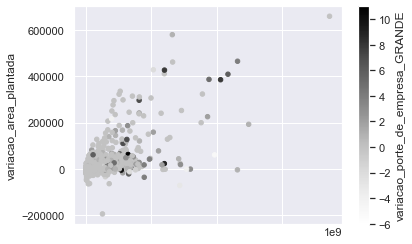

In [31]:
df_crescimento.plot.scatter(x='sum',y='variacao_area_plantada',c='variacao_porte_de_empresa_GRANDE')

In [80]:
sns.set_theme(style="darkgrid")

fig, axs = plt.subplots(3, 2,figsize=(14,15))
labels_rows = ['variacao razao plantio/colheita','variacao area plantada (hectares)','variacao area colhida (hectares)']
rows = ['variacao_razao_plantio_colheita','variacao_area_plantada','variacao_area_colhida']
labels_columns = ['variação no número de invest. em empresas micros','variação no número de invest. em empresas grandes']
columns = ['variacao_porte_de_empresa_GRANDE','variacao_porte_de_empresa_MICRO']
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.3)

for j in range(2):
    for i in range(3):
        sc = axs[i,j].scatter(df_crescimento['sum'],df_crescimento[rows[i]],alpha=0.5,c=df_crescimento[columns[j]],cmap='Accent')
        axs[i,j].set_ylabel(labels_rows[i])
        axs[i,j].set_xlabel('valor do investimento (R$)')
    cbar = plt.colorbar(sc,ax=axs[:, j],shrink=0.5)
    cbar.set_label(labels_columns[j])
